<b>Effect on engagement minutes – second round | Larger datasets with NN and Random Forest

We're trying to work out how elements of news articles affect their engagement time

Odyssey articles (rich media) v Standard articles

In [ ]:
# import data and change categorical variables

import pandas as pd

odyssey_articles = pd.read_csv('Article templates - Odyssey - LARGE edited CSV.csv')

odyssey_articles['template'].mask(odyssey_articles['template'] == 'Odyssey', 1, inplace=True)


odyssey_articles.head().round(2)



,views,views_abc_web,views_abc_app,views_external,language,words,paragraphs,subheadings,videos,audio,...,lists,teasers,external_links,interactives,template,weekday,is_news_inner_metro,is_news_outer_metro,is_news_regional,engagement_minutes
0,218705,122157.0,90552.0,5996.0,en,4323,192,6,0,0,...,4,0,2,0,1,3,1,1,1,935529.89
1,66822,29472.0,35601.0,1749.0,en,3282,170,14,3,0,...,1,0,0,0,1,2,1,0,1,461818.55
2,113,97.0,16.0,NaN,in,1873,127,3,3,0,...,0,0,0,0,1,1,0,0,0,927.23
3,57848,26637.0,18867.0,12344.0,en,2797,162,1,4,0,...,1,1,0,0,1,1,0,0,1,192115.98
4,373116,95340.0,151167.0,126609.0,en,1941,165,6,0,0,...,1,0,0,0,1,7,1,1,0,1225989.36


In [ ]:
# There are 150 or so articles that have some missing values

print(len(odyssey_articles)) # 966 articles in original dataset
print(odyssey_articles.isna().sum())

#lets drop them
odyssey_articles = odyssey_articles.dropna()
print("dataset length:", len(odyssey_articles)) # now at 825 articles

966
views                    0
views_abc_web            1
views_abc_app            5
views_external         141
language                 0
words                    0
paragraphs               0
subheadings              0
videos                   0
audio                    0
photos                   0
pullquotes               0
blockquotes              0
tables                   0
lists                    0
teasers                  0
external_links           0
interactives             0
template                 0
weekday                  0
is_news_inner_metro      0
is_news_outer_metro      0
is_news_regional         0
engagement_minutes       2
dtype: int64
dataset length: 825


In [ ]:
# now let's remove the articles not in English
# looks like removing articles with missing fields did the job anyway
# because our total number of articles didn't change

odyssey_articles = odyssey_articles[odyssey_articles.language == "en"]
print(len(odyssey_articles))

825


In [ ]:
odyssey_articles.head()

,views,views_abc_web,views_abc_app,views_external,language,words,paragraphs,subheadings,videos,audio,...,lists,teasers,external_links,interactives,template,weekday,is_news_inner_metro,is_news_outer_metro,is_news_regional,engagement_minutes
0,218705,122157.0,90552.0,5996.0,en,4323,192,6,0,0,...,4,0,2,0,1,3,1,1,1,9.355299e+05
1,66822,29472.0,35601.0,1749.0,en,3282,170,14,3,0,...,1,0,0,0,1,2,1,0,1,4.618185e+05
3,57848,26637.0,18867.0,12344.0,en,2797,162,1,4,0,...,1,1,0,0,1,1,0,0,1,1.921160e+05
4,373116,95340.0,151167.0,126609.0,en,1941,165,6,0,0,...,1,0,0,0,1,7,1,1,0,1.225989e+06
5,306757,167012.0,105002.0,34743.0,en,2663,170,4,23,0,...,1,0,0,0,1,7,0,0,1,1.442472e+06


In [ ]:
# let's now drop that all the views columns and the language column
# let's also drop the audio option as it is rarely used so may be
# causing the model to overfit


odyssey_articles.drop(odyssey_articles.columns[:5], axis=1, inplace=True)
odyssey_articles.head()

,words,paragraphs,subheadings,videos,audio,photos,pullquotes,blockquotes,tables,lists,teasers,external_links,interactives,template,weekday,is_news_inner_metro,is_news_outer_metro,is_news_regional,engagement_minutes
0,4323,192,6,0,0,20,0,0,0,4,0,2,0,1,3,1,1,1,9.355299e+05
1,3282,170,14,3,0,19,6,0,0,1,0,0,0,1,2,1,0,1,4.618185e+05
3,2797,162,1,4,0,40,9,0,0,1,1,0,0,1,1,0,0,1,1.921160e+05
4,1941,165,6,0,0,30,2,0,0,1,0,0,0,1,7,1,1,0,1.225989e+06
5,2663,170,4,23,0,34,7,0,0,1,0,0,0,1,7,0,0,1,1.442472e+06


In [ ]:
odyssey_articles.drop(odyssey_articles.columns[4:5], axis=1, inplace=True)

In [ ]:
# checking there are no duplications
odyssey_articles.duplicated().any()

False

In [ ]:
print(odyssey_articles.shape)

(825, 18)


Standard articles

In [ ]:
# import data and change categorical variables

standard_articles = pd.read_csv('Article templates - Standard - LARGE - edited CSV.csv')

#standard_articles['template'].mask(odyssey_articles['template'] == 'Odyssey', 1, inplace=True)


standard_articles.head().round(2)

,views,views_abc_web,views_abc_app,views_external,language,words,paragraphs,subheadings,videos,audio,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,2402,1569,774.0,59.0,en,826,34,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1348,580,712.0,56.0,en,387,19,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11951,4301,5011.0,2639.0,en,360,16,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4597,1781,2712.0,104.0,en,358,17,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28235,8587,19048.0,600.0,en,835,35,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop some empty columns at the end

standard_articles.drop(standard_articles.columns[24:], axis=1, inplace=True)

In [ ]:
# check shape and number of articles
standard_articles.shape

(5000, 24)

In [ ]:
# set each template value to 0

standard_articles = standard_articles.assign(template=0)

In [ ]:
print(len(standard_articles)) # 5000 articles in original dataset
print(standard_articles.isna().sum())

#lets drop them
standard_articles = standard_articles.dropna()
print("new dataset length:", len(standard_articles)) # now at 825 articles

5000
views                    0
views_abc_web            0
views_abc_app            3
views_external         238
language                 0
words                    0
paragraphs               0
subheadings              0
videos                   0
audio                    2
photos                   2
pullquotes               0
blockquotes              0
tables                   0
lists                    0
teasers                  0
external_links           1
interactives             0
template                 0
weekday                  4
is_news_inner_metro      3
is_news_outer_metro      5
is_news_regional         3
engagement_minutes       0
dtype: int64
new dataset length: 4756


In [ ]:

standard_articles.head().round(2)

,views,views_abc_web,views_abc_app,views_external,language,words,paragraphs,subheadings,videos,audio,...,lists,teasers,external_links,interactives,template,weekday,is_news_inner_metro,is_news_outer_metro,is_news_regional,engagement_minutes
0,2402,1569,774.0,59.0,en,826,34,4,0,0,...,0,0,0.0,3,0,4,1,0,0,7022.29
1,1348,580,712.0,56.0,en,387,19,0,0,0,...,0,0,2.0,0,0,4,0,0,1,1643.02
2,11951,4301,5011.0,2639.0,en,360,16,0,0,0,...,0,1,1.0,0,0,4,0,0,0,21404.50
3,4597,1781,2712.0,104.0,en,358,17,0,1,0,...,0,0,0.0,0,0,4,1,0,0,8122.83
4,28235,8587,19048.0,600.0,en,835,35,2,1,0,...,0,1,0.0,0,0,4,1,0,0,69939.81


In [ ]:
# checking there are no duplications
odyssey_articles.duplicated().any()

False

In [ ]:
#remove views and language

standard_articles.drop(standard_articles.columns[:5], axis=1, inplace=True)
standard_articles.head()

,words,paragraphs,subheadings,videos,audio,photos,pullquotes,blockquotes,tables,lists,teasers,external_links,interactives,template,weekday,is_news_inner_metro,is_news_outer_metro,is_news_regional,engagement_minutes
0,826,34,4,0,0,2,2,0,0,0,0,0.0,3,0,4,1,0,0,7022.294543
1,387,19,0,0,0,2,0,0,0,0,0,2.0,0,0,4,0,0,1,1643.017233
2,360,16,0,0,0,2,0,0,0,0,1,1.0,0,0,4,0,0,0,21404.499380
3,358,17,0,1,0,1,1,0,0,0,0,0.0,0,0,4,1,0,0,8122.832302
4,835,35,2,1,0,4,4,0,0,0,1,0.0,0,0,4,1,0,0,69939.809710


In [ ]:
#remove audio
standard_articles.drop(standard_articles.columns[4:5], axis=1, inplace=True)

Combine two datasets and shuffle them

In [ ]:
# this is the size of each data set
print(odyssey_articles.shape)
print(standard_articles.shape)

(825, 18)
(4756, 18)


In [ ]:
# Shuffle standard articles then remove 3931 of them so we have 825 of each kind

standard_articles = standard_articles.sample(frac=1, random_state=0)
standard_articles.drop(standard_articles.index[825: ], axis=0, inplace=True)
standard_articles.head().round(2)

# shuffle odyssey articles

odyssey_articles = odyssey_articles.sample(frac=1, random_state=0)
odyssey_articles.head().round(2)
print(odyssey_articles.shape)
print(standard_articles.shape)
print(odyssey_articles.head().round(2))
print(standard_articles.head().round(2))

(825, 18)
(825, 18)
     words  paragraphs  subheadings  videos  photos  pullquotes  blockquotes  \
922   2196          83            2       3      27           2            0   
33    1179          86            6       3      36           4            2   
9     2034         103            9       2      14           4            1   
783   4263         288            8       0      46           7            0   
616    828          72            0       0       1           0            0   

     tables  lists  teasers  external_links  interactives template  weekday  \
922       1      0        0               0             0        1        2   
33        0      0        1               0             0        1        1   
9         0      1        0               0             0        1        6   
783       0      1        0               0             0        1        5   
616       0      0        0               0             0        1        2   

     is_news_inner_metro

In [ ]:
# stack the two dataframes together
# now that we have equal amounts of both
# and shuffle them randomly


all_articles = pd.concat([odyssey_articles, standard_articles], ignore_index=True, axis=0)
all_shuffled = all_articles.sample(frac=1, random_state=0)
print(all_shuffled.shape)
print(all_shuffled.head().round(2))

(1650, 18)
     words paragraphs subheadings videos photos pullquotes  blockquotes  \
223   4904        303          10      0     42          0            1   
501   3220        220           6      0     44          4            0   
1561   871         31           4      1      2          1            0   
1612   647         29           1      1      5          3            0   
1633  1199         54           3      2      1          4            0   

      tables  lists  teasers  external_links  interactives template weekday  \
223        0      0        1             0.0             0        1       3   
501        0      1        0             0.0             0        1       5   
1561       0      0        0             0.0             0        0       5   
1612       0      0        0             0.0             0        0       6   
1633       0      0        0             1.0             0        0       6   

     is_news_inner_metro is_news_outer_metro is_news_regional  

In [ ]:
# make sure all the data types are numerical

all_shuffled['template'] = pd.to_numeric(all_shuffled['template'], errors='coerce')

all_shuffled['engagement_minutes'] = all_shuffled['engagement_minutes'].replace(',', '', regex=True)
all_shuffled['words'] = all_shuffled['words'].replace(',', '', regex=True)

all_shuffled['engagement_minutes'] = all_shuffled['engagement_minutes'].astype(int)
all_shuffled['words'] = all_shuffled['words'].astype(int)
all_shuffled['paragraphs'] = all_shuffled['paragraphs'].astype(int)
all_shuffled['subheadings'] = all_shuffled['subheadings'].astype(int)
all_shuffled['videos'] = all_shuffled['videos'].astype(int)
#all_shuffled['audio'] = all_shuffled['audio'].astype(int)
all_shuffled['photos'] = all_shuffled['photos'].astype(int)
all_shuffled['pullquotes'] = all_shuffled['pullquotes'].astype(int)
all_shuffled['weekday'] = all_shuffled['weekday'].astype(int)
all_shuffled['is_news_inner_metro'] = all_shuffled['is_news_inner_metro'].astype(int)
all_shuffled['is_news_outer_metro'] = all_shuffled['is_news_outer_metro'].astype(int)
all_shuffled['is_news_regional'] = all_shuffled['is_news_regional'].astype(int)




print(all_shuffled.shape)
print(all_shuffled.dtypes)

(1650, 18)
words                    int32
paragraphs               int32
subheadings              int32
videos                   int32
photos                   int32
pullquotes               int32
blockquotes              int64
tables                   int64
lists                    int64
teasers                  int64
external_links         float64
interactives             int64
template                 int64
weekday                  int32
is_news_inner_metro      int32
is_news_outer_metro      int32
is_news_regional         int32
engagement_minutes       int32
dtype: object


In [ ]:
# put them into a numpy array

import numpy as np

array = all_shuffled.values

X = array[ : , :-1]
Y = array[ : , -1:]


In [ ]:
#Now we can build a decision tree regressor
# This is a good starting point for a model
# Decision trees add non-linearity but they don't need huge datasets like neural networks


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

decision_tree = DecisionTreeRegressor(max_depth=3, random_state=0)


decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.23644919905692374
Mean Squared Error: 1572966485269.6494


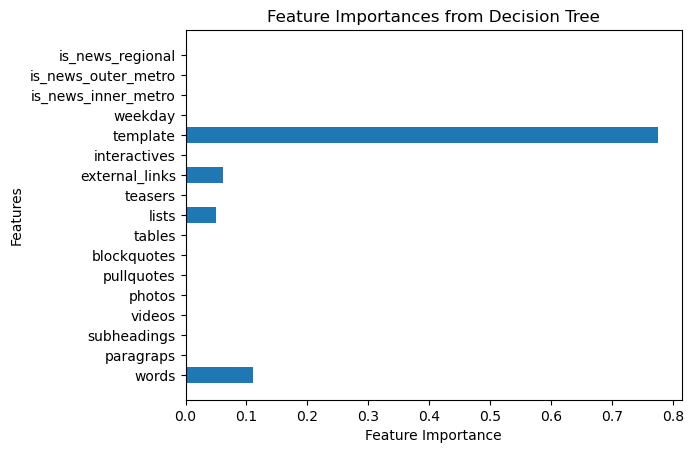

In [ ]:
# Get feature importances from the decision tree
# Even though the R-squared is low let's see what features are most
# influencing this model

import matplotlib.pyplot as plt
import numpy as np

importance = decision_tree.feature_importances_

# Plotting feature importances
plt.barh(['words', 'paragraps', 'subheadings', 'videos', 'photos',
          'pullquotes', 'blockquotes', 'tables', 'lists', 'teasers', 'external_links',
          'interactives', 'template', 'weekday', 'is_news_inner_metro', 'is_news_outer_metro',
         'is_news_regional'], importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Decision Tree')
plt.show()


Neural network model



In [ ]:
# Not sure how this will go -- likely too few training examples
# Let's use Keras/Tensor flow sequental models

import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import r2_score


tf.set_random_seed(0)
np.random.seed(0)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the neural network model
model = Sequential([
    Dense(5, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Mean Squared Error: {loss}')

# Predictions
predictions = model.predict(x_test)

r_squared = r2_score(y_test, predictions)
print(r_squared)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Train on 1056 samples, validate on 264 samples
Epoch 1/10
1056/1056 [==============================] - 0s 348us/sample - loss: 2166130500010.6667 - val_loss: 1694515559330.9092
Epoch 2/10
1056/1056 [==============================] - 0s 76us/sample - loss: 2166130340041.6968 - val_loss: 1694515402317.5754
Epoch 3/10
1056/1056 [==============================] - 0s 71us/sample - loss: 2166130270114.9092 - val_loss: 1694515277824.0000
Epoch 4/10
1056/1056 [==============================] - 0s 73us/sample - loss: 2166130186953.6968 - val_loss: 1694515143276.6062
Epoch 5/10
1056/1056 [==============================] - 0s 75us/sample - loss: 2166130026309.8184 - val_loss: 1694515012670.0605
Epoch 6/10
1056/1056 [==============================] - 0s 103us/sample - loss: 2166129939132.1211 - val_loss: 1694514981934.5457
Epoch 7/10
1056/1056 [==============================] - 0s 99us/sample - loss: 2166129942667.6365 - val_loss: 1694514925443.8789
Epoch 8/10
1056/1056 [==========================

<b> Random forest

In [ ]:
# Decision tree worked much better so let's move on
# to try a random forest

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Log-transform the target variable (engagement_minutes) to reduce skewness
# Use np.log1p to handle cases where the target might be zero (log(1+x) avoids log(0) issues)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# let's use a random forest model
randomforest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
randomforest_model.fit(x_train_scaled, np.ravel(y_train_log))

# Predict and evaluate the model using R-squared on the log-transformed target
rf_score = randomforest_model.score(x_test_scaled, np.ravel(y_test_log))

# Output the R-squared score
print(f'R-squared (Random Forest on log-transformed target): {rf_score}')

# If you want to reverse the log transformation on the predictions and evaluate the model on the original scale:
#y_pred_log = randomforest_model.predict(x_test_scaled)
#y_pred_original = np.expm1(y_pred_log)  # Reverse log1p to get back to the original scale


R-squared (Random Forest on log-transformed target): 0.6256760191255728


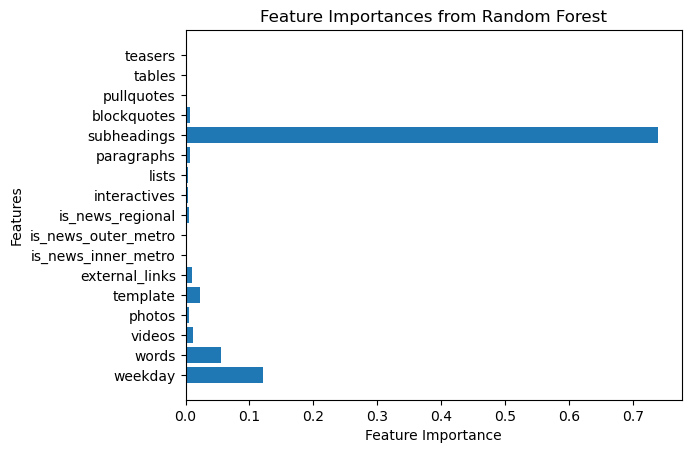

In [ ]:
# Get feature importances from random forest
importance = randomforest_model.feature_importances_


feature_names = ['weekday', 'words', 'videos', 'photos', 'template', 'external_links',
                 'is_news_inner_metro', 'is_news_outer_metro', 'is_news_regional',
                 'interactives', 'lists', 'paragraphs', 'subheadings', 'blockquotes',
                 'pullquotes', 'tables', 'teasers']

# Ensure the length of feature_names matches importance array
assert len(feature_names) == len(importance), "Feature names length must match feature importances length"

# Plot the feature importances
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.show()



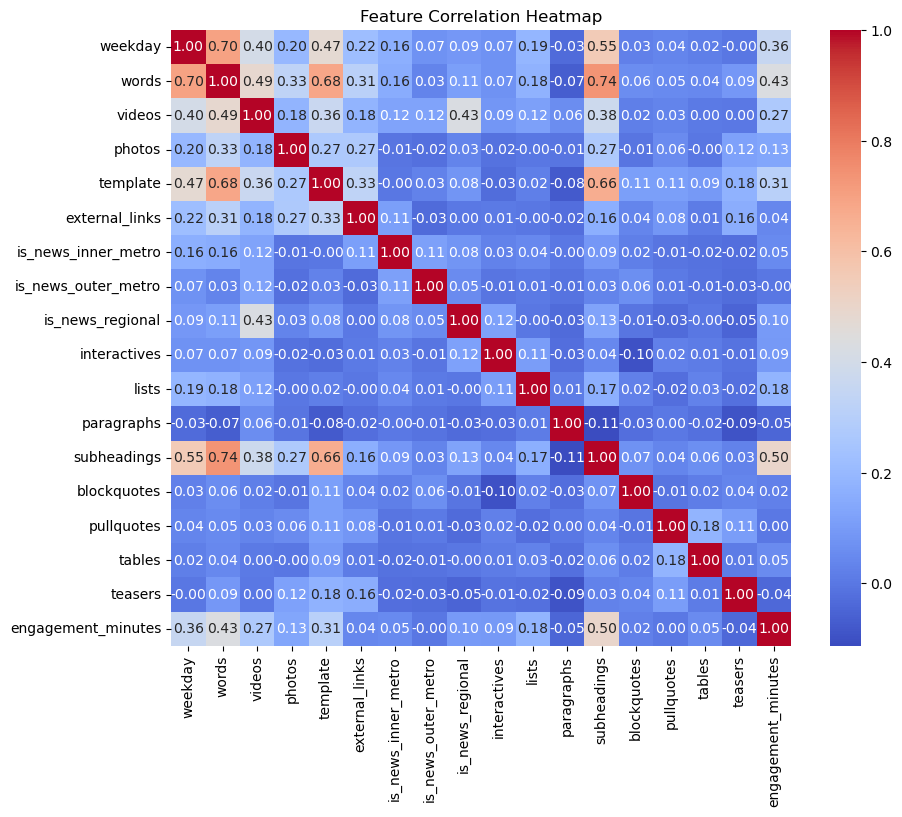

In [ ]:
# Let's try visualising correlations with seaborn
# Not sure how reliable these are given all the variables not
# captured in the data

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


feature_names = ['weekday', 'words', 'videos', 'photos', 'template',
                 'external_links', 'is_news_inner_metro', 'is_news_outer_metro',
                 'is_news_regional', 'interactives', 'lists', 'paragraphs',
                 'subheadings', 'blockquotes', 'pullquotes',
                 'tables', 'teasers']


feature_df = pd.DataFrame(X, columns=feature_names)
feature_df['engagement_minutes'] = Y

# Generate the correlation matrix
corr_matrix = feature_df.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# How important is template?
# here we randomly shuffles one
# feature at a time and measure how much the model’s performance decreases


from sklearn.inspection import permutation_importance

result = permutation_importance(randomforest_model, x_test_scaled, np.ravel(y_test_log), n_repeats=10, random_state=0)
importance_means = result.importances_mean

# Print the permutation importance of template
print(f'Template Permutation Importance: {importance_means[12:13]}')

Template Permutation Importance: [0.40858149]


In [ ]:
# try running the model without template
# and see how much the worse the R2 gets
# it doesn't get much worse

# Remove the template column from the training and testing sets
x_train_no_template = np.delete(x_train_scaled, 12, axis=1)
x_test_no_template = np.delete(x_test_scaled, 12, axis=1)

# Train the model without template
randomforest_no_template = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
randomforest_no_template.fit(x_train_no_template, np.ravel(y_train_log))
rf_no_template_score = randomforest_no_template.score(x_test_no_template, np.ravel(y_test_log))

print(f'R-squared without Template: {rf_no_template_score}')


R-squared without Template: 0.616799536473515


In [ ]:
# Let's see how much impact subheadings are having
# and see if removing them makes the model worse

# Remove the subheadings column from the training and test sets
x_train_no_subheadings = np.delete(x_train_scaled, 2, axis=1)
x_test_no_subheadings = np.delete(x_test_scaled, 2, axis=1)

# Train the model again
randomforest_no_subheadings = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
randomforest_no_subheadings.fit(x_train_no_subheadings, np.ravel(y_train_log))

# Evaluate the model without subheadings
rf_no_subheadings_score = randomforest_no_subheadings.score(x_test_no_subheadings, np.ravel(y_test_log))
print(f'R-squared without Subheadings: {rf_no_subheadings_score}')

R-squared without Subheadings: 0.6228803872470823


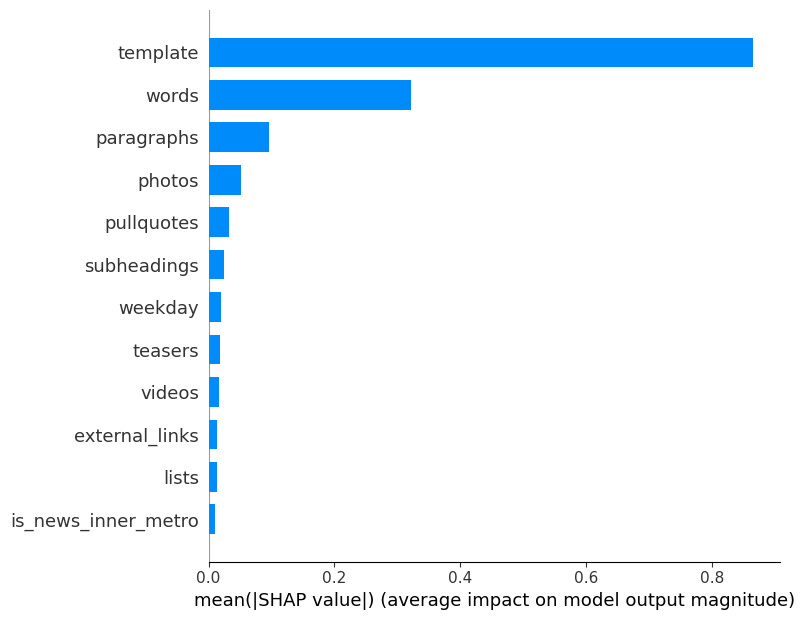

In [ ]:
# Get SHAP values
# To understand the impact of each feature on the model
# I think this is a better measure of feature importance than
# the correlation map

import shap
import matplotlib.pyplot as plt

# Initialise the SHAP chart
explainer = shap.TreeExplainer(randomforest_model)

feature_names = ['words', 'paragraphs', 'subheadings', 'videos', 'photos', 'pullquotes',
                'blockquotes', 'tables', 'lists', 'teasers', 'external_links', 'interactives',
                'template', 'weekday', 'is_news_inner_metro', 'is_news_outer_metro',
                'is_news_regional']


shap_values = explainer.shap_values(x_test_scaled)


shap.summary_plot(shap_values, x_test_scaled, plot_type="bar", feature_names = feature_names, max_display=12)